## Regression

In [1]:
# libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# load data
# os.chdir('sample_data')
california_train = pd.read_csv('california_housing_train.csv')
california_test = pd.read_csv('california_housing_test.csv')
california_train.shape, california_test.shape

((17000, 9), (3000, 9))

In [16]:
# define X and y
y_train = california_train['median_house_value']
X_train = california_train.iloc[:, 0:8]
y_test = california_test['median_house_value']
X_test = california_test.iloc[:, 0:8]

In [17]:
# display dimension
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17000, 8), (17000,), (3000, 8), (3000,))

In [30]:
# features (X): normalize | (x - u)/(SD)
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

# target (y): rescale | x / max(x)
y_train = y_train/y_train.max()
y_test = y_test/y_test.max()

In [10]:
# import
import tensorflow as tf

Relu is a type of activation function, and it takes the following form
$$\text{ReLU}(x) = \max(x, 0)$$
It means that we compare $x$ with 0. If it's positive, we let it go. If it's negative, we replace it with 0. We recall linear regression model can give us negative values, but this data we predict housing price and it cannot be negative.

1-layer model (think of it as linear regression model):

$$
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}
→_{w_1, w_2, w_3}
\rightarrow
y
$$


multi-layer model (call it a neural network):

$$
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}
→_{\{w_{1,1}, w_{2,1}, w_{3,1}\}, \{w_{1,2}, w_{2,2}, w_{3,2}\}, \vec{w}_{.,3}}
\rightarrow
\begin{bmatrix}
a_1 \\
a_2 \\
a_3 \\
\end{bmatrix}_{\text{hidden layer 1}}
\rightarrow
y
$$

Model 1:

In [95]:
# # build model
# linear_model = tf.keras.models.Sequential()

# # 1st layer
# linear_model.add(tf.keras.layers.Dense(1, input_shape=[8]))

Model 2:

In [101]:
# build model
linear_model = tf.keras.models.Sequential()

# 1st layer
linear_model.add(tf.keras.layers.Dense(128, input_shape=[8]))

# hidden layer
linear_model.add(tf.keras.layers.Dense(64, activation="relu"))

# finish with output layer
linear_model.add(tf.keras.layers.Dense(1))

It is an optimization problem.
- First, define $\mathcal{L}(y, \hat{y})$
- Second, compute $\nabla \mathcal{L}(y, \hat{y})$
- Do your for loop which is gradient descent: at each step $s$, update the weight according to the following
$$w_s := w_{s-1} - \eta \cdot \nabla \mathcal{L}(y, \hat{y})$$
continue the above until either two things happen: (a) until $s$ hits maximum threshold, (b) until it converges (accuracy/loss flattens out).

In [102]:
# compile
# mse: mean square eror
# sgd: stochastic gradient descent
linear_model.compile(loss='mse', optimizer='sgd')

Recall machine learning template: define `model`, and then train by using `model.fit`.

We learn a function/map called $f(\cdot)$ such that $f(X)$ can produce $y$ with as little error as it can.

In [103]:
# fit
whatever_you_trained = linear_model.fit(
    x=X_train, # features
    y=y_train, # target
    validation_split=0.2, # this is a fraction that takes 20% of the data randomly and perform on
    epochs=10
)

Epoch 1/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0284 - val_loss: 0.0315
Epoch 2/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0173 - val_loss: 0.0271
Epoch 3/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0160 - val_loss: 0.0263
Epoch 4/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0154 - val_loss: 0.0255
Epoch 5/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0151 - val_loss: 0.0245
Epoch 6/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0147 - val_loss: 0.0239
Epoch 7/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0145 - val_loss: 0.0237
Epoch 8/10
425/425 [==============================] - 2s 4ms/step - loss: 0.0143 - val_loss: 0.0235
Epoch 9/10
425/425 [==============================] - 1s 3ms/step - loss: 0.0141 - val_loss: 0.0232
Epoch 10/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0140 - val_loss: 0.0228

In [80]:
# some_dictionary = {'a': 'apple', 'b': [1,2,3,4,5]}
# some_dictionary

In [79]:
# plt.plot(some_dictionary['b'])

In [78]:
# whatever_you_trained.history

In [77]:
# # plot
# plt.figure(figsize=(6, 3))
# plt.plot(history.history['loss'])
# plt.ylim([0, 0.11])
# plt.plot(history.history['val_loss'])
# plt.title('path for loss (train and val) | 2 hidden layers')
# plt.legend(['train', 'validating'])
# plt.show()

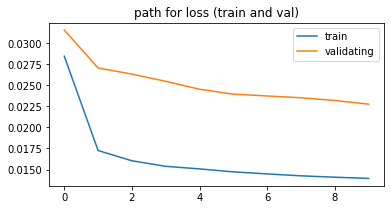

In [104]:
# plot
plt.figure(figsize=(6, 3))
plt.plot(whatever_you_trained.history['loss'])
plt.plot(whatever_you_trained.history['val_loss'])
plt.title('path for loss (train and val)')
plt.legend(['train', 'validating'])
plt.show()

In [81]:
# # plot
# plt.figure(figsize=(8, 3))
# plt.subplot(1, 2, 1) # (number of row, number of column, which plot)
# plt.plot(history.history['loss'])
# plt.title('train')
# plt.subplot(1, 2, 2)
# plt.plot(history.history['val_loss'])
# plt.title('val')
# plt.show()

Evaluation 1:

In [105]:
# evaluation: this gives you whatever you defined in model.compile
linear_model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.0161


0.01605927012860775

Evaluation 2:

In [84]:
# library: mae
from sklearn.metrics import mean_absolute_error

Mean absolute error is
$$\text{MAE}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|$$

In [106]:
# use predictions
prediction_on_test = linear_model.predict(X_test)
mean_absolute_error(y_true=y_test, y_pred=prediction_on_test)

0.09100143396304759

In [94]:
# draft
# np.mean(np.abs(prediction_on_test.reshape(-1) - y_test))

Conclusion

| Model | Score | MAE |
|  ---  |  ---  | --- |
| Linear Model | 0.02 | 0.10 |
| 2-layer Model | 0.016 | 0.091 |

## Classification

In [109]:
# use tf API to load the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [110]:
# display dimension
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [114]:
X_train[0].shape

(28, 28)

In [121]:
np.unique(y_train), len(np.unique(y_train))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), 10)

In [128]:
X_train.max(), X_train.min()

(255, 0)

In [132]:
(X_train/X_train.max()).min(), (X_train/X_train.max()).max()

(0.0, 1.0)

In [133]:
# rescale: X/max(X)
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

In [144]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

One hot encode:

$$
\begin{bmatrix}
5 \\
0 \\
4 \\
\end{bmatrix}
\rightarrow_\text{one-hot}
\begin{bmatrix}
'5' & '0' & '4' \\
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1\\
\end{bmatrix}
$$

In [145]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)
y_train_onehot.shape, y_test_onehot.shape

((60000, 10), (10000, 10))

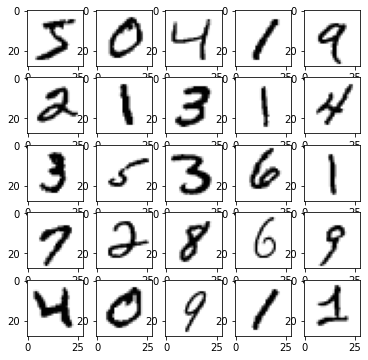

In [119]:
# plot
# args: (1) 2D array, (2) 3D array (but the last dim has to be 3)
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='binary')

plt.show()

Model 1

In [153]:
# build model
model = tf.keras.models.Sequential()

# flatten
model.add(tf.keras.layers.Flatten())

# output
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Model 2

In [164]:
# build model
model = tf.keras.models.Sequential()

# flatten
model.add(tf.keras.layers.Flatten())

# hidden
# things to change:
# width of each layer: (units/neurons) you can change the number of units!!!
# depth of the network: you can have any number of Dense layers you like!!!
# summarize: [128, 64, 32]
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

# output
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [165]:
# compile
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

There are 10 classes.

In [166]:
# fit
history = model.fit(X_train, y_train_onehot, validation_split=0.2, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0894 - accuracy: 0.1786 - val_loss: 0.0887 - val_accuracy: 0.2365
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0880 - accuracy: 0.2619 - val_loss: 0.0871 - val_accuracy: 0.3022
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0860 - accuracy: 0.3144 - val_loss: 0.0844 - val_accuracy: 0.3478
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0827 - accuracy: 0.3634 - val_loss: 0.0800 - val_accuracy: 0.3987
Epoch 5/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0775 - accuracy: 0.4172 - val_loss: 0.0739 - val_accuracy: 0.4572
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0712 - accuracy: 0.4742 - val_loss: 0.0670 - val_accuracy: 0.5052
Epoch 7/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0640 - accuracy: 0.5249 - val_loss: 0.0596 - val_accuracy:

In [167]:
# evaluation
model.evaluate(X_test, y_test_onehot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0106 - accuracy: 0.9302


[0.010638113133609295, 0.9301999807357788]

Conclusion

| Use Hidden | Model | Epochs |Loss | Accuracy |
| --- |  ---  |  ---   | ---  | --- |
| No  | Logistic Model (no one hot) | 10 | 27 | 0.10 |
| No | Logistic Model (10-class) | 10 | 0.0324 | 0.837 |
| Yes | [128, 64, 32] | 10 | 0.028 | 0.85 |
| Yes | [128, 64, 32] | 100 | 0.01 | 0.93 |
| Yes| [1024, 64, 32] | 10 | 0.020    | 0.885    |